All below follow PD03_processing_cop.ipynb

In [60]:
import pandas as pd

In [61]:
import numpy as np

In [3]:
import sys
sys.path.append("../../../")

In [4]:
from proj_mod import fill_in_linearly

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df_his_index=pd.read_csv("../../processed/his_index_tech_500_stable_14_24.csv")

In [65]:
lst_date_we_care=df_his_index["Date"].to_list()

In [66]:
df_pal=pd.read_csv("../../raw/macro_daily/palladium-prices-historical-chart-data.csv")

In [67]:
df_pal

,date,value
0,1977-01-05,51.25
1,1977-01-06,51.90
2,1977-01-07,53.00
3,1977-01-10,52.25
4,1977-01-11,52.00
...,...,...
12162,2025-04-03,NaN
12163,2025-04-04,NaN
12164,2025-04-05,NaN
12165,2025-04-06,NaN


In [68]:
df_pal_care=df_pal[df_pal["date"].isin(lst_date_we_care)]

In [69]:
df_pal_care

,date,value
9297,2014-01-02,730.25
9298,2014-01-03,731.20
9299,2014-01-06,738.50
9300,2014-01-07,741.70
9301,2014-01-08,738.30
...,...,...
12043,2024-10-24,1145.00
12044,2024-10-25,1179.00
12045,2024-10-28,12.00
12046,2024-10-29,1199.00


In [70]:
lst_missing=list(set(lst_date_we_care)-set(df_pal_care["date"].to_list()))

In [71]:
lst_missing

['2015-07-13', '2023-11-22', '2023-11-21']

In [72]:
df_pal_data=pd.DataFrame({"date": lst_date_we_care})

In [73]:
df_pal_data=df_pal_data.join(df_pal_care.set_index("date"), how="left", on="date")

In [74]:
df_pal_data

,date,value
0,2014-01-02,730.25
1,2014-01-03,731.20
2,2014-01-06,738.50
3,2014-01-07,741.70
4,2014-01-08,738.30
...,...,...
2563,2024-10-24,1145.00
2564,2024-10-25,1179.00
2565,2024-10-28,12.00
2566,2024-10-29,1199.00


In [75]:
df_pal_data[df_pal_data[" value"].isna()]

,date,value
366,2015-07-13,NaN
2331,2023-11-21,NaN
2332,2023-11-22,NaN


In [76]:
df_pal_data["date"]=pd.to_datetime(df_pal_data["date"])

In [77]:
fill_in_linearly.v_datetime(df_pal_data, "date", " value")

,date,value
0,2014-01-02,730.25
1,2014-01-03,731.20
2,2014-01-06,738.50
3,2014-01-07,741.70
4,2014-01-08,738.30
...,...,...
2563,2024-10-24,1145.00
2564,2024-10-25,1179.00
2565,2024-10-28,12.00
2566,2024-10-29,1199.00


In [78]:
df_pal[(df_pal["date"]=="2013-12-31")|(df_pal["date"]=="2014-01-01")]

,date,value
9296,2013-12-31,718.3


In [79]:
df_pal[df_pal["date"]=="2014-01-02"][" value"]

9297    730.25
Name:  value, dtype: float64

In [80]:
lst_pro_change=[(np.sqrt(df_pal[df_pal["date"]=="2014-01-02"][" value"].values[0]/df_pal[df_pal["date"]=="2013-12-31"][" value"].values[0])-1)*100]

In [81]:
for index in range(1, 2568): 
    lst_pro_change.append((df_pal_data.loc[index][" value"]/df_pal_data.loc[index-1][" value"]-1)*100)

In [82]:
df_pal_data["pro_change"]=lst_pro_change

In [83]:
df_pal_data

,date,value,pro_change
0,2014-01-02,730.25,0.828394
1,2014-01-03,731.20,0.130092
2,2014-01-06,738.50,0.998359
3,2014-01-07,741.70,0.433311
4,2014-01-08,738.30,-0.458406
...,...,...,...
2563,2024-10-24,1145.00,7.209738
2564,2024-10-25,1179.00,2.969432
2565,2024-10-28,12.00,-98.982188
2566,2024-10-29,1199.00,9891.666667


Now correct 2017-07-06 pro_change

In [84]:
df_pal_data[df_pal_data["date"]=="2017-07-06"]

,date,value,pro_change
737,2017-07-06,832.2,21.80022


In [85]:
df_pal[df_pal["date"]=="2017-07-05"]

,date,value
10178,2017-07-05,834.4


In [86]:
df_pal_data.at[737, "pro_change"]=(df_pal_data[df_pal_data["date"]=="2017-07-06"][" value"].values[0]/df_pal[df_pal["date"]=="2017-07-05"][" value"].values[0]-1)*100

In [87]:
df_pal_data[df_pal_data["date"]=="2017-07-06"]

,date,value,pro_change
737,2017-07-06,832.2,-0.263663


In [88]:
df_pal_data

,date,value,pro_change
0,2014-01-02,730.25,0.828394
1,2014-01-03,731.20,0.130092
2,2014-01-06,738.50,0.998359
3,2014-01-07,741.70,0.433311
4,2014-01-08,738.30,-0.458406
...,...,...,...
2563,2024-10-24,1145.00,7.209738
2564,2024-10-25,1179.00,2.969432
2565,2024-10-28,12.00,-98.982188
2566,2024-10-29,1199.00,9891.666667


In [89]:
df_pal_data.to_csv("../../processed/pal_daily_we_care.csv")

There are extreme values. Like 2024-10-29. 

In [90]:
df_his_index["Date"]=pd.to_datetime(df_his_index["Date"])

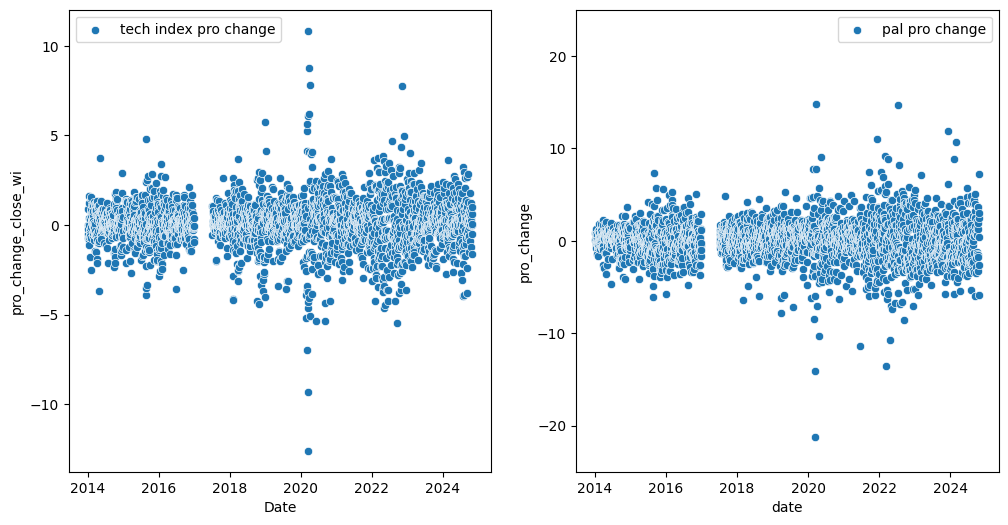

In [91]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(12,6))

sns.scatterplot(data=df_his_index, x="Date", y="pro_change_close_wi", label="tech index pro change", ax=ax[0])
sns.scatterplot(data=df_pal_data, x="date", y="pro_change",label="pal pro change", ax=ax[1])

ax[1].set_ylim(-25,25)

plt.show()